## The stochastic system identification toolkit (SSIT) 
The vision for the SSIT is to **make model creation easy** and **comparison to single-cell data of stochastic biochemical reaction networks more simple.** There are many other software packages that do make it easy to write and simulate, but very few (if any?) of them have the built-in capability for fitting experimental data or experimental design for stochastic biochemical reaction networks. 

While those are the eventual goals of the SSIT, at the moment it is a convenient way to describe _simple_ stochastic models and solve them. This is especially useful for FSP or other "direct CME analyses" in which writing the equations is often cumbersome and solving systems can be computationally challenging. 

In [1]:
import sys
sys.path.append('../codes')
from importlib import reload
import numpy as np
import generic_solvers as gs
reload(gs)
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# A simple model of bursting gene expression using the SSIT. 

# 1. Describe the model in terms stochiometry and propensity functions
R = ['kon*x[0]','koff*x[1]','kr*x[1]','g*x[2]']
S = np.array([[-1,1,0],  # gene off -> gene on 
              [1,-1,0],  # gene on -> gene off
              [0,0,1],   # gene on -> gene on + RNA 
             [0,0,-1]])  # RNA -> 0 

# From these descriptions, we can create a "generic model" object 
# from which we can simulate the system however we want.
model = gs.GenericModel()
model.init_model(S,R)

# The parameters are automatically detected and assigned values
print(model.parameter_dict)

# but are easily changed
parameter_vec = [0.1,0.3,50.0,1.0]
model.set_par_vec(parameter_vec)
print(model.parameter_dict)

{'kon': 1, 'koff': 1, 'kr': 1, 'g': 1}
{'kon': 0.1, 'koff': 0.3, 'kr': 50.0, 'g': 1.0}


## Solve the model as ODEs 

<IPython.core.display.Javascript object>


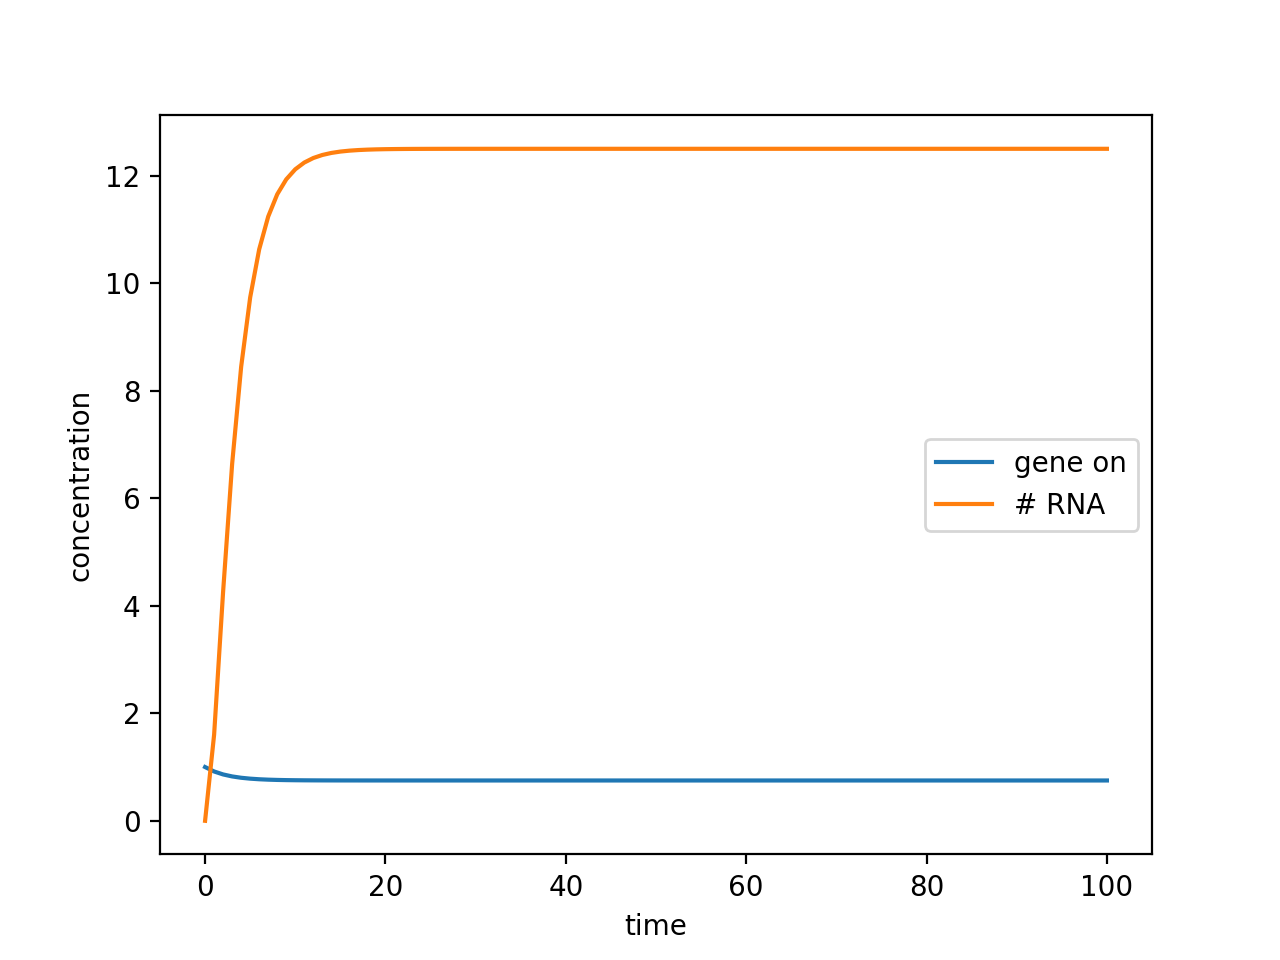

Text(0, 0.5, 'concentration')

In [4]:
# Solve the model with the SSIT
ode = model.get_ODE()
model.initial_state = np.array([1,0,0])

ode_data=ode.run()


# plotting
plt.figure()
plt.plot(ode_data.time,ode_data.state[:,[0,2]])
plt.legend(['gene on','# RNA'])
plt.xlabel('time')
plt.ylabel('concentration')


## Solve the model with stochastic simulations

<IPython.core.display.Javascript object>


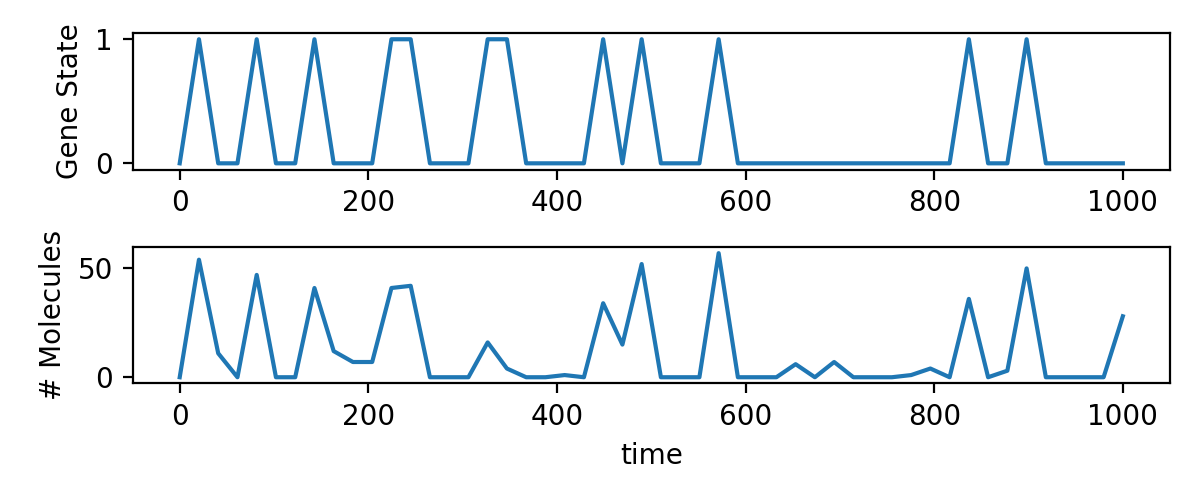

In [5]:
ssa = model.get_SSA()
ssa.initial_state = np.array([1,0,0])

ssa.num_samples = 100
ssa.time = np.linspace(0,1000)
ts_data=ssa.run()

f,ax = plt.subplots(2,1,figsize = (6,2.5))
ax[0].plot(ssa.time,ts_data.get_time_series(0,1))
ax[1].plot(ssa.time,ts_data.get_time_series(0,2))

ax[1].set_xlabel('time')
ax[0].set_ylabel('Gene State')
ax[1].set_ylabel('# Molecules')
f.tight_layout()



<IPython.core.display.Javascript object>


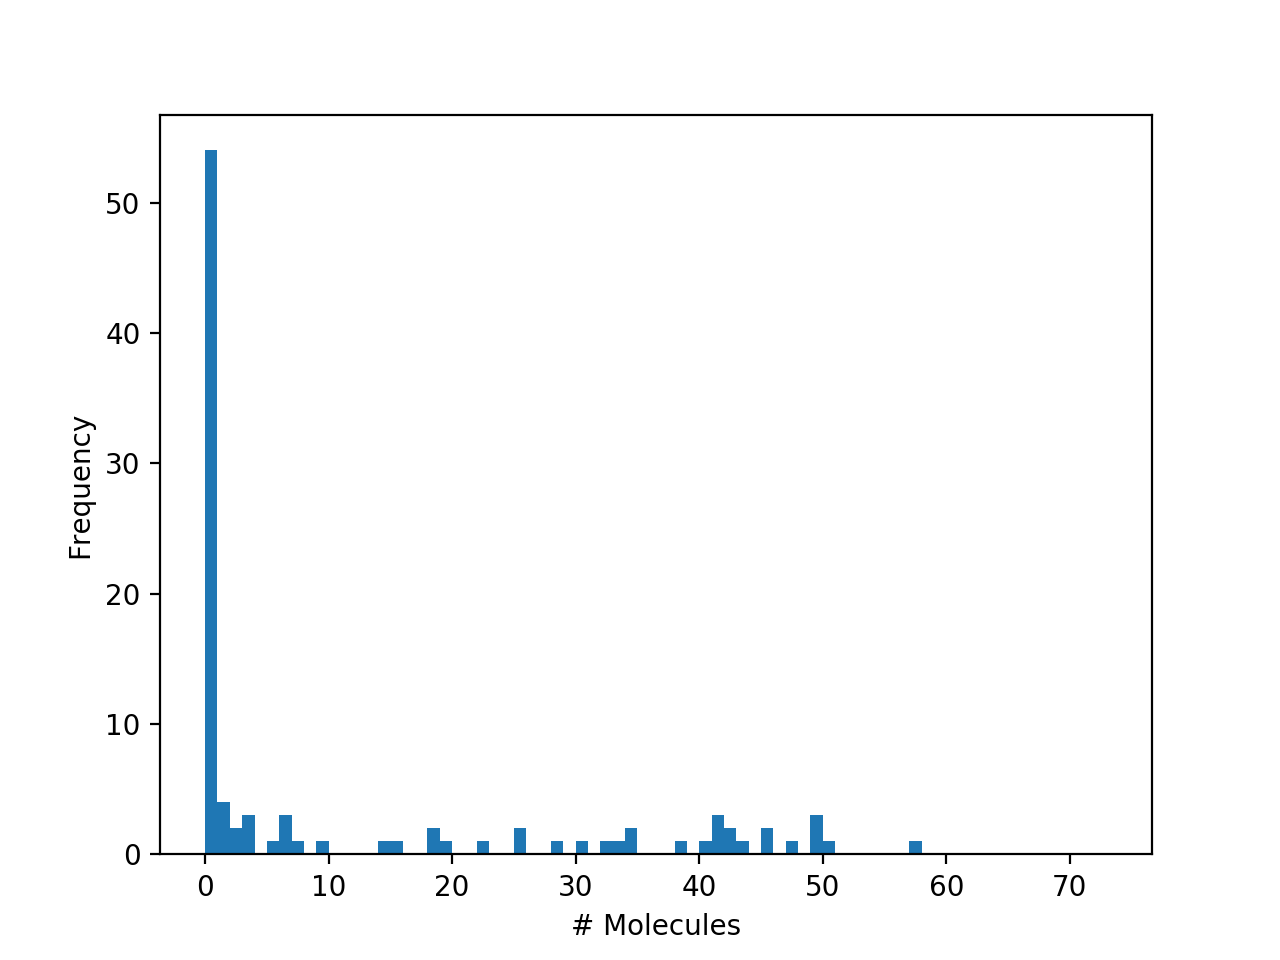

In [70]:
data = ts_data.get_data_tensor()
plt.figure()
plt.hist(data[-1,2,:],bins=np.arange(np.max(data[-1,2,:])))
plt.xlabel('# Molecules')
plt.ylabel('Frequency')

## Solve the model with the FSP approach simulations

In [ ]:
fsp = model.get_FSP()
fsp.initial_state = np.array([1,0,0])


ts_data=fsp.run()

# f,ax = plt.subplots(2,1,figsize = (6,2.5))
# ax[0].plot(ssa.time,ts_data.get_time_series(0,1))
# ax[1].plot(ssa.time,ts_data.get_time_series(0,2))

# ax[1].set_xlabel('time')
# ax[0].set_ylabel('Gene State')
# ax[1].set_ylabel('# Molecules')
# f.tight_layout()